<a href="https://colab.research.google.com/github/nickmccarty/ugail-and-stork-paper-implementation/blob/main/MobileNet_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Paper](https://heritagesciencejournal.springeropen.com/articles/10.1186/s40494-023-01094-0)

[GitHub Repo](https://github.com/ugail/RaphaelHeritageSciencePaper)

In [ ]:
!wget https://github.com/nickmccarty/ugail-and-stork-paper-implementation/raw/main/Data.zip
!wget https://github.com/nickmccarty/ugail-and-stork-paper-implementation/raw/main/Tests.zip
!wget https://github.com/nickmccarty/ugail-and-stork-paper-implementation/raw/main/models.zip
!wget https://github.com/nickmccarty/ugail-and-stork-paper-implementation/raw/main/test.jpg

--2024-04-23 00:43:01--  https://github.com/nickmccarty/ugail-and-stork-paper-implementation/raw/main/Data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/nickmccarty/ugail-and-stork-paper-implementation/main/Data.zip [following]
--2024-04-23 00:43:01--  https://media.githubusercontent.com/media/nickmccarty/ugail-and-stork-paper-implementation/main/Data.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87727853 (84M) [application/zip]
Saving to: ‘Data.zip’

Data.zip            100%[===================>]  83.66M  87.0MB/s    in 1.0s    

2024-04-23 00:43:05 (87.0 MB/s) - ‘Da

In [ ]:
!mkdir Tests
!mkdir models
!mv Tests.zip Tests/Tests.zip
!mv models.zip models/models.zip
!unzip Data.zip

Archive:  Data.zip
  inflating: Data/Not Raphael/Rembrandt #12 - Jewish Bride - Oil on canvas - 121 X 166 cm - 1665-1669 - Rijksmuseum.jpg  
  inflating: Data/Not Raphael/Bol #2 - Aeneaus Crowning Cloanthus - Oil on canvas - 218 X 232 cm - 1661-1663 - Rijksmuseum.jpg  
  inflating: Data/Not Raphael/Bol #18 - Portrait of a Man - Oil on canvas - 124 X 100 cm - 1663 - Rijksmuseum.jpg  
  inflating: Data/Not Raphael/Lely #83 - 1650 Two Ladies of the Lake Family copy.jpg  
  inflating: Data/Not Raphael/Rembrandt #31 - Titus at his Desk_-_Oil on canvas - 77 X 63 cm - 1655 - Museum Boijmans Van Beuningen.jpg  
  inflating: Data/Not Raphael/LivPhoto.jpg  
  inflating: Data/Not Raphael/Lely #59 - Lucy Loftus - sold by Sotheby's January 2023 for $1.2 Million copy.jpg  
  inflating: Data/Not Raphael/Lely #3 - Mary Framington - Christie's sale- edited copy.jpg  
  inflating: Data/Not Raphael/Rembrandt #18 - Night Watch - Oil on canvas 379 X 453 cm - 1642 - Rijksmusem.jpg  
  inflating: Data/Not Ra

In [ ]:
%cd Tests
!unzip Tests.zip

/content/Tests
Archive:  Tests.zip
mapname:  conversion of  failed
 extracting: The de Brécy Tondo.png  
 extracting: Madonna della Rosa.jpg  
 extracting: Madonna della Rosa A.jpg  
 extracting: Madonna della Rosa C.jpg  
 extracting: Madonna della Rosa D.jpg  
 extracting: SistineMadonaOriginal.jpg  
 extracting: Madonna della Rosa  E.jpg  
 extracting: Madonna della Rosa  B.jpg  
 extracting: Lely #11 - 1665 Diana_Kirke.jpg  
 extracting: Authentic Raphael self portrait.jpg  
 extracting: Raphael copy - by Steven Christopher Seward.jpg  
 extracting: 2016 Discovery Innocenzo Francucci da Imola The Virgin.jpg  
 extracting: Figure 8.10 Raffaello_-_Spozalizio_-_Web_Gallery_of_Art.jpg  


In [ ]:
%cd ../models
!unzip models.zip

Archive:  models.zip
mapname:  conversion of  failed
 extracting: resnet50_model.h5       
 extracting: 28_09_2023_svm_final_model.pkl  


In [ ]:
%cd ../
!rm -r Data.zip Tests/Tests.zip models/models.zip sample_data/

In [ ]:
from sklearn.model_selection import train_test_split
import os
import shutil

data_dir = 'Data' # This is the current path to your image folders
train_ratio = 0.8  # 80% of data for training, 20% for validation

categories = ['Raphael', 'Not Raphael']

# Create train and validation folders
for category in categories:
    os.makedirs(os.path.join(data_dir, 'train', category), exist_ok=True)
    os.makedirs(os.path.join(data_dir, 'validation', category), exist_ok=True)

    # Get all images in the current category
    source_folder = os.path.join(data_dir, category)
    all_images = os.listdir(source_folder)

    # Split the list into training and validation
    train_imgs, val_imgs = train_test_split(all_images, train_size=train_ratio, random_state=42)

    # Move images to respective folders
    for img in train_imgs:
        src_path = os.path.join(source_folder, img)
        dst_path = os.path.join(data_dir, 'train', category, img)
        shutil.move(src_path, dst_path)

    for img in val_imgs:
        src_path = os.path.join(source_folder, img)
        dst_path = os.path.join(data_dir, 'validation', category, img)
        shutil.move(src_path, dst_path)

In [ ]:
!rm -r "Data/Raphael"
!rm -r "Data/Not Raphael"

In [ ]:
import numpy as np
from tensorflow.keras.applications import MobileNet  # Lighter model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.mobilenet import preprocess_input

# Load MobileNet model not including the top layer:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout layer added

# Add a logistic layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Construct the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
train_dir = 'Data/train'
validation_dir = 'Data/validation'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

Found 76 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping])

Epoch 1/100
1/5 [=====>........................] - ETA: 14s - loss: 0.6193 - accuracy: 0.6667

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (104439920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


5/5 [==============================] - 14s 3s/step - loss: 0.5929 - accuracy: 0.6184 - val_loss: 0.1716 - val_accuracy: 0.9500
Epoch 2/100
5/5 [==============================] - 8s 1s/step - loss: 0.2900 - accuracy: 0.8421 - val_loss: 0.4441 - val_accuracy: 0.8500
Epoch 3/100
5/5 [==============================] - 10s 2s/step - loss: 0.2624 - accuracy: 0.9079 - val_loss: 0.1535 - val_accuracy: 0.9000
Epoch 4/100
5/5 [==============================] - 9s 2s/step - loss: 0.1556 - accuracy: 0.9211 - val_loss: 0.2114 - val_accuracy: 0.9500
Epoch 5/100
5/5 [==============================] - 11s 2s/step - loss: 0.1596 - accuracy: 0.9474 - val_loss: 0.2107 - val_accuracy: 0.9000
Epoch 6/100
5/5 [==============================] - 8s 2s/step - loss: 0.2639 - accuracy: 0.8684 - val_loss: 0.3424 - val_accuracy: 0.9000


In [ ]:
# Save model
model.save('my_model.h5')

# Evaluate model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 2s 132ms/step - loss: 0.1535 - accuracy: 0.9000
Validation Loss: 0.1535394787788391
Validation Accuracy: 0.8999999761581421


In [ ]:
from tensorflow.keras.preprocessing import image

def make_prediction(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    return prediction[0][0]

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

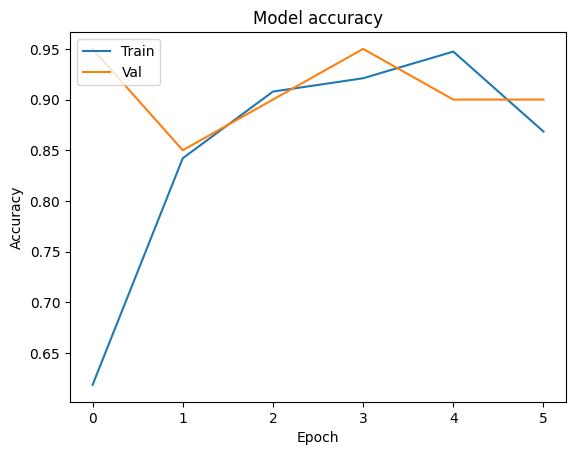

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

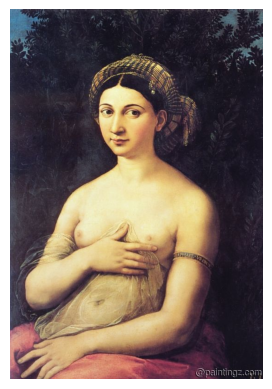

In [ ]:
from PIL import Image

# Specify the path to your image
img_path = 'test.jpg'

# Open the image file
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [ ]:
def classify_image(img_path, threshold=0.5):
    probability = make_prediction(img_path)
    if probability > threshold:
        return "Raphael", probability
    else:
        return "Not Raphael", probability

# Example usage
result, prob = classify_image('test.jpg')
print(f"Class: {result}, Probability: {prob:.4f}")

1/1 [==============================] - 1s 1s/step
Class: Raphael, Probability: 0.7177


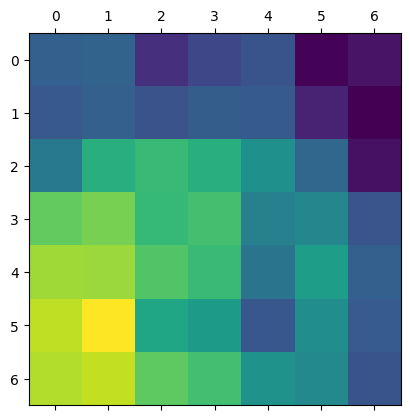

In [ ]:
import tensorflow as tf

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Correct layer name
conv_layer_name = 'conv_pw_13'
conv_layer = model.get_layer(conv_layer_name)
heatmap_model = Model([model.inputs], [conv_layer.output, model.output])

# Get the gradient of the top predicted class for the input image
with tf.GradientTape() as tape:
    conv_output, predictions = heatmap_model(x)
    loss = predictions[:, np.argmax(predictions[0])]
grads = tape.gradient(loss, conv_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Multiply each channel in the feature map array by "how important this channel is" with regard to the top predicted class
conv_output = conv_output[0]
heatmap = conv_output @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# For visualization purpose, we normalize the heatmap
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

# Plot heatmap
plt.matshow(heatmap)
plt.show()

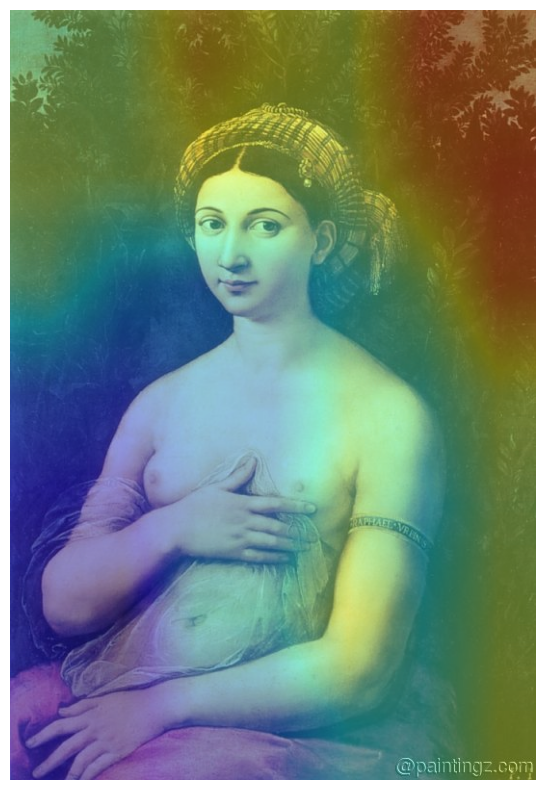

In [ ]:
import cv2

# Load image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
original_img_size = img.shape[:2]  # original image size

# Resize heatmap to match the size of the image
heatmap = np.uint8(255 * heatmap)  # Convert to uint8
heatmap = cv2.resize(heatmap, (original_img_size[1], original_img_size[0]))  # Resize to image size
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Convert to heatmap

# Superimpose heatmap on original image
superimposed_img = heatmap * 0.4 + img * 0.6
superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')  # Clip to valid range [0,255]

# Save and display image
cv2.imwrite('image_with_heatmap.jpg', cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))
plt.figure(figsize=(10, 10))
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()